In [1]:
import os
os.chdir("/project/validating_attribution_techniques/")

In [2]:
from commons.api.utils import set_to_our_gpus, enable_web_access
set_to_our_gpus()
enable_web_access()

In [3]:


from commons.api.imagenet_tiny import get_imagenet_classes, get_random_images

from torchvision.models import resnet50, resnet18, vgg16, inception_v3



from commons.api.viz import visualize_saliency_overlay
from commons.api.method.attribution import attribution

from commons.api.target_layer import get_model_and_target_layer
from commons.api.pil_to_tensor import pil_to_tensor

In [4]:
os.chdir("/project/validating_attribution_techniques/torchCAM")
from torchcam.methods.gradient import SmoothGradCAMpp, GradCAMpp, GradCAM, LayerCAM

from torchcam.methods.activation import ScoreCAM
from torchcam.utils import overlay_mask

In [5]:
os.chdir("/project/validating_attribution_techniques/")

In [6]:
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib.figure import Figure

from PIL import Image
from numpy import random
# import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
import torch
from cv2 import EMD
import cv2
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image 
# from ScoreCAM import cam

from matplotlib.pyplot import imshow
from torchvision import models, transforms
from torchvision.utils import save_image

In [7]:
classes = get_imagenet_classes()

In [8]:
#Load all images
images = np.load('/project/validating_attribution_techniques/abid/data/ground_saliency_images/images_2_fixed.npy', allow_pickle=True)
masks = np.load('/project/validating_attribution_techniques/abid/data/ground_saliency_images/obj_masks_2_fixed.npy', allow_pickle=True)


In [9]:
get_model_and_target_layer?

Signature: get_model_and_target_layer(model_name)
Docstring:
Get the model and its target layer based on the model name.

Args:
    model_name (str): The name of the model (e.g., 'ResNet50', 'ResNet18', 'VGG16', 'InceptionV3').

Returns:
    torch.nn.Module: The model instance.
    str or torch.nn.Module: The target layer for the model.

Usage:
- Call this function to retrieve a model and its corresponding target layer based on the model name.
File:      /project/validating_attribution_techniques/commons/api/target_layer.py
Type:      function

# Attribution 

In [10]:
from commons.api.method.attribution import attribution

In [11]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
model, target_layer = get_model_and_target_layer("ResNet50")

model_resnet50 = model.to(device).eval()
# # model_resnet18 = resnet18(pretrained=True).to(device).eval()
# # model_vgg = vgg16(pretrained=True).to(device).eval()
# # model_inception3 = inception_v3(pretrained=True).to(device).eval()
# model_resnet50.eval()

/scratch/shkulkar/python/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/scratch/shkulkar/python/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
type(model_resnet50)

torchvision.models.resnet.ResNet

In [13]:
# target_layer = model_resnet50.layer4[1].conv2
# target_layer = "layer4.1"

# target_layer=model_resnet50.layer4[-1].conv3

In [14]:
target_layer

Bottleneck(
  (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)

In [15]:
#pil to tensor transform
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

In [17]:
img_idx = 0

(224, 224, 3)

In [24]:
original_image1 = Image.fromarray(images[img_idx])
# original_image = read_image("/project/validating_attribution_techniques/commons/examples/input.png")
# plt.imshow(original_image)
# input_tensor = transform(original_image1).to(device)
input_tensor = pil_to_tensor(original_image1).to(device)

In [25]:
#if in case you do not want to specify target layer(default is set to 'layer4')
grad_cam, grad_idx, grad_probs = attribution(model_resnet50, input_tensor, "GradCAM", target_layer)
score_cam, score_idx, score_probs = attribution(model_resnet50, input_tensor, "ScoreCAM", target_layer)   
smoothgradpp_cam, smoothgradpp_idx, smoothgradpp_probs = attribution(model_resnet50, input_tensor, "SmoothGradCAMpp", target_layer)
layer_cam, layer_idx, layer_probs = attribution(model_resnet50, input_tensor, "LayerCAM", target_layer)

In [26]:
print(grad_cam.shape)
print(score_cam.shape)
print(smoothgradpp_cam.shape)
print(layer_cam.shape)

(7, 7)
(7, 7)
(7, 7)
(7, 7)


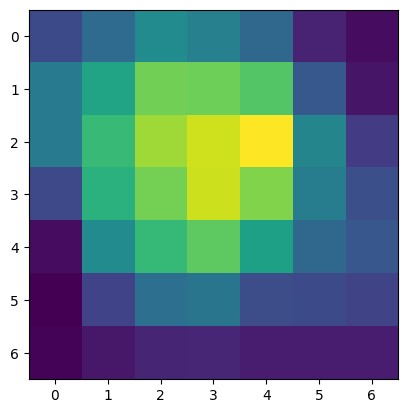

In [27]:
plt.imshow(grad_cam)

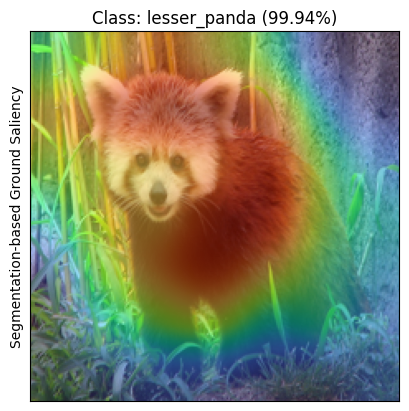

In [28]:
visualize_saliency_overlay(plt.gca(), original_image1,score_cam, score_probs, score_idx, classes);

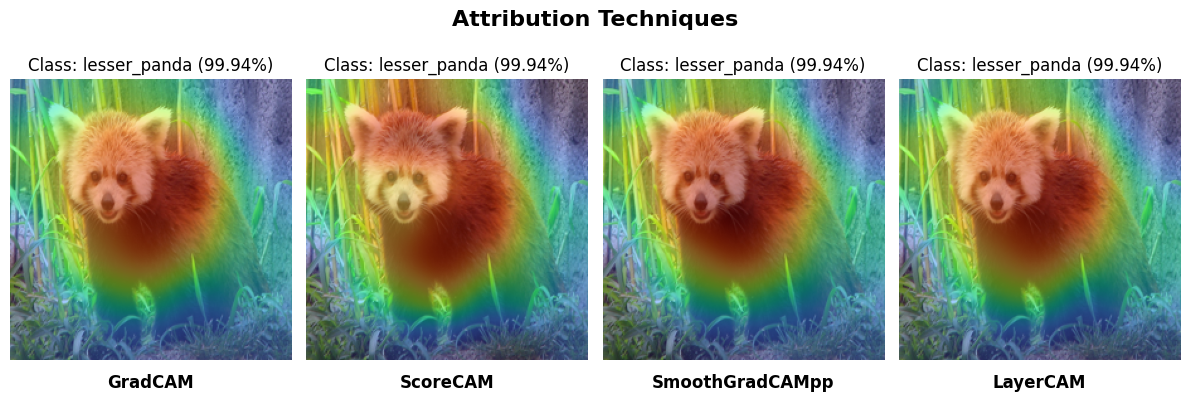

In [29]:
# fig, axes = plt.subplots(ncols=2, nrows=1)
fig, axes = plt.subplots(ncols=4, nrows=1)

fig.set_figwidth(12)
fig.set_layout_engine('tight')
fig.suptitle("Attribution Techniques", fontsize=16, fontweight="bold",y=0.9)
# fig.set_figheight(40)
# Turn off the axis for each subplot
for ax in axes:
    ax.axis('off')
# Titles for each subplot
titles = [ "GradCAM", "ScoreCAM", "SmoothGradCAMpp", "LayerCAM"]

visualize_saliency_overlay(axes[0], original_image1, grad_cam, grad_probs, grad_idx, classes);
visualize_saliency_overlay(axes[1], original_image1, score_cam, score_probs, score_idx, classes);
visualize_saliency_overlay(axes[2], original_image1, smoothgradpp_cam, smoothgradpp_probs, smoothgradpp_idx, classes);
visualize_saliency_overlay(axes[3], original_image1, layer_cam, layer_probs, layer_idx, classes);
for i, ax in enumerate(axes):
    ax.text(0.5, -0.1, titles[i], horizontalalignment='center', fontsize=12, fontweight='bold', transform=ax.transAxes)

# Metrics

In [21]:
os.chdir("/project/validating_attribution_techniques/")
from commons.api.metric.compare_metrics import normalize, match_hist, normalize_map
# You can call them one by one or all at once all the functions return values of the metrics
from commons.api.metric.compare_metrics import SIM, CC, NSS, AUC_Judd, wasserstein_distance
from commons.api.metric.compare_metrics import calculate_metrics

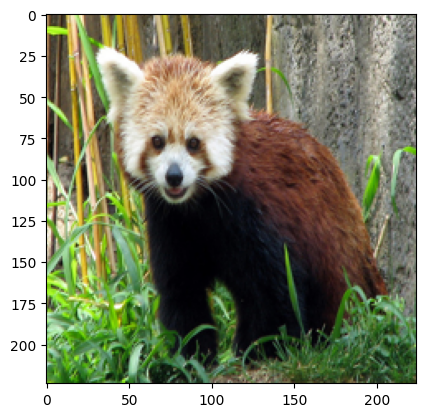

In [22]:
# original_image = Image.open('/project/validating_attribution_techniques/commons/examples/input.png')
# original_iamge = Image.fromarray(images[0])
imshow(original_image1)
# layer_original_image = read_image("/project/validating_attribution_techniques/commons/examples/input.png")
# plt.imshow(original_image)
original_input_tensor = transform(original_image1).to(device)

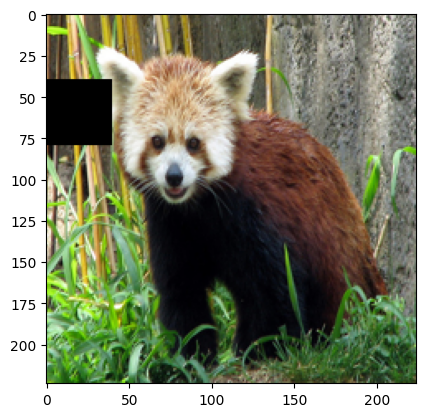

In [23]:
perturbed_image = Image.open(f"/project/validating_attribution_techniques/shardul/data/Doc/Experimentation/Occlusion_Results/Single_Patch/Img_0/Images_40/Occlusion_40_6.png")
imshow(perturbed_image)
perturbed_input_tensor = transform(perturbed_image).to(device)


In [24]:
original_grad_cam, original_grad_idx, original_grad_probs = attribution(model_resnet50, original_input_tensor, "GradCAM", target_layer)
perturbed_grad_cam, perturbed_grad_idx, perturbed_grad_probs = attribution(model_resnet50, perturbed_input_tensor, "GradCAM", target_layer)
# gradcam_mask, perturbed_grad_idx, perturbed_grad_probs = gradcam_wrapped_model(perturbed_input_grad)
# pertubed_grad_cam = gradcam_mask.cpu().numpy().squeeze()

In [25]:
print((original_grad_cam.shape))

(7, 7)


In [26]:
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.transforms import IdentityTransform
def text_to_rgba(s, *, dpi, **kwargs):
    # To convert a text string to an image, we can:
    # - draw it on an empty and transparent figure;
    # - save the figure to a temporary buffer using ``bbox_inches="tight",
    #   pad_inches=0`` which will pick the correct area to save;
    # - load the buffer using ``plt.imread``.
    #
    # (If desired, one can also directly save the image to the filesystem.)
    fig = Figure(facecolor="none", figsize=(10, 10))
    fig.text(0, 0, s, **kwargs)
    with BytesIO() as buf:
        fig.savefig(buf, dpi=dpi, format="png", bbox_inches="tight",
                    pad_inches=0)
        buf.seek(0)
        rgba = plt.imread(buf)
    return rgba

In [27]:
print(type(original_grad_cam))
print(type(perturbed_grad_cam))
type(masks[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


numpy.ndarray

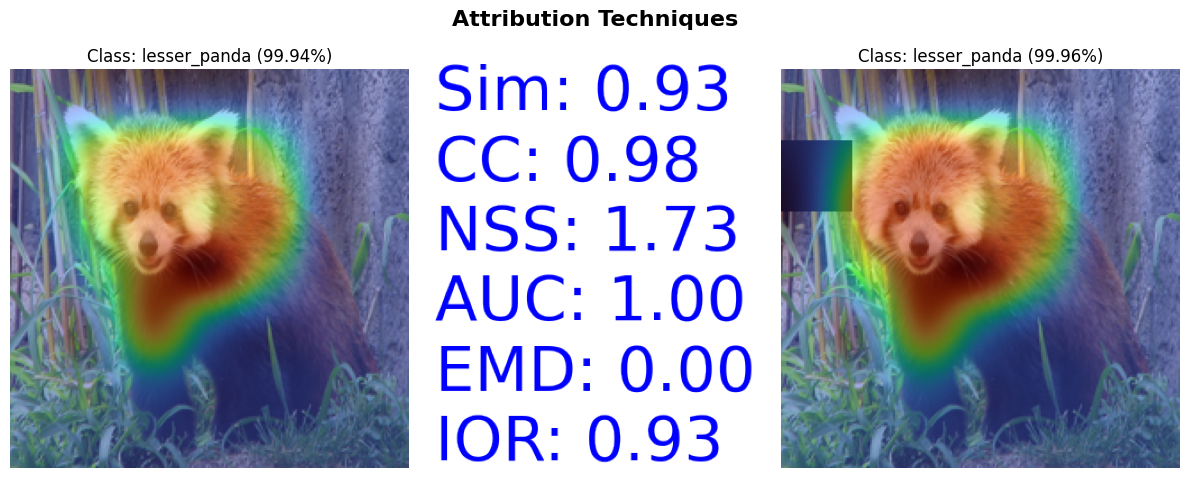

In [28]:

# fig, axes = plt.subplots(ncols=2, nrows=1)
fig, axes = plt.subplots(ncols=3, nrows=1)

fig.set_figwidth(12)
fig.set_layout_engine('tight')
fig.suptitle("Attribution Techniques", fontsize=16, fontweight="bold",y=1.0)
# fig.set_figheight(40)
# Turn off the axis for each subplot
for ax in axes:
    ax.axis('off')
# Titles for each subplot
titles = [ "Original", "Perturbed"]

visualize_saliency_overlay(axes[0], original_image1, original_grad_cam, original_grad_probs, original_grad_idx, classes);
visualize_saliency_overlay(axes[2], perturbed_image, perturbed_grad_cam, perturbed_grad_probs, perturbed_grad_idx, classes);

#Pass two saliencies of shape
sim_grad, cc_grad, nss_grad, auc_grad, emd_grad, ior_grad = calculate_metrics(original_grad_cam, perturbed_grad_cam, masks[0])
# perturbed_sim_score, perturbed_cc_score, perturbed_nss_score, perturbed_auc, perturbed_emd  = calculate_metrics(scorecam_mask, occlu_scorecam_mask)


text_grad = f"Sim: {sim_grad:.2f}\nCC: {cc_grad:.2f}\nNSS: {nss_grad:.2f}\nAUC: {auc_grad:.2f}\nEMD: {emd_grad:.2f}" + (f"\nIOR: {ior_grad:.2f}" if ior_grad is not None else "")

axes[1].imshow(text_to_rgba(text_grad, color="blue", fontsize=20, dpi=200))
    
# text_score = f"Sim: {sim_score:.2f}\nCC: {cc_score:.2f}\nNSS: {nss_score:.2f}"
# axis[3].imshow(text_to_rgba(text_score, color="blue", fontsize=20, dpi=200))

# for i, ax in enumerate(axes):
#     ax.text(0.5, -0.1, titles[i], horizontalalignment='center', fontsize=12, fontweight='bold', transform=ax.transAxes)

In [ ]:
img_idx = 0
patch_size = 40
sample_occlu_imgs = np.load(f"/project/validating_attribution_techniques/shardul/data/Doc/Experimentation/Occlusion_Results/Single_Patch/Img_{img_idx}/occluded_image_list_patch_{patch_size}_idx_{img_idx}.npy")
img = Image.fromarray((sample_occlu_imgs[0]*255).astype(np.uint8))
perturbed_input = transform(img).to(device)
perturbed_grad_cam, perturbed_grad_idx, perturbed_grad_probs = attribution(model_resnet50, perturbed_input, "GradCAM", target_layer)


In [ ]:
visualize_saliency_overlay(plt.gca(), img, perturbed_grad_cam, perturbed_grad_probs, perturbed_grad_idx, classes);

In [ ]:
img_idx = 0
patch_size = 40
img = Image.open(f"/project/validating_attribution_techniques/shardul/data/Doc/Experimentation/Occlusion_Results/Single_Patch/Img_{img_idx}/Images_{patch_size}/Occlusion_{patch_size}_0.png")
    # img = Image.fromarray((sample_occlu_imgs[i] * 255).astype(np.uint8))
occlu_input_tensor = transform(img).to(device)

# pertubed_grad_cam, pertubed_grad_idx, pertubed_grad_probs = attribution(model_resnet50, occlu_input_tensor, "GradCAM", target_layer)
gradcam_mask, gradcam_idx, gradcam_probs = gradcam_wrapped_model(occlu_input_tensor)
pertubed_grad_cam = gradcam_mask.cpu().numpy().squeeze()


In [ ]:
perturbed_grad_cam

In [ ]:
perturbed_input_tensor